In [1]:
import os
import sklearn
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
file_dir = os.path.join('/Users/digisha/Downloads/Fatigue_project')
#file_name = os.path.join(file_dir, 'Fatigue_sample.csv')
file_name = os.path.join(file_dir, 'data.csv')
df = pd.read_csv(file_name)
df.head()

,time_id,pat_id,q_id,ans
0,6,8,4,4
1,10,5,2,1
2,14,9,2,1
3,5,1,2,2
4,7,6,4,4


In [5]:
df_scores = df.groupby(['time_id', 'pat_id'])['ans'].sum().reset_index()
df_scores.head(30)

,time_id,pat_id,ans
0,1,1,1
1,1,2,4
2,1,3,5
3,1,4,4
4,1,5,6
5,1,6,5
6,1,8,5
7,1,10,6
8,2,4,4
9,2,5,9


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


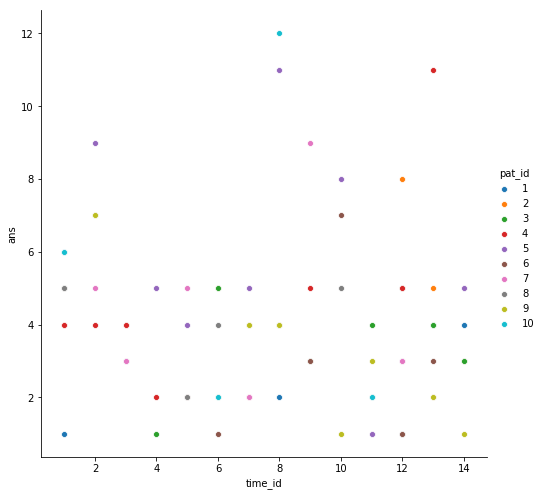

In [4]:
sns.pairplot(x_vars=['time_id'], y_vars=['ans'],data = df_scores, hue = 'pat_id', size=7)

In [4]:
f1 = df_scores['time_id'].values
f2 = df_scores['ans'].values
f3 = df_scores['pat_id'].values
X1 = np.array(list(zip(f1, f2, f3)))
X = X1[:, [0,1]]

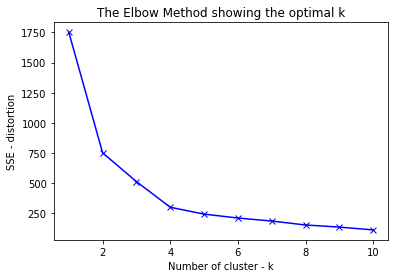

In [5]:
sse = {}
#%matplotlib auto
for k in range (1, 11):
 
    #Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    df_scores["clusters"] = kmeans_model.labels_

    # Sum of distances of samples to their closest cluster center
    sse[k] = kmeans_model.inertia_
    #print ("k:",k, " cost:", interia)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster - k")
plt.ylabel("SSE - distortion")
plt.title('The Elbow Method showing the optimal k')
plt.show()
#we can see using the knee method, the results are best for k = 4

In [6]:
# Number of clusters
kmeans = KMeans(n_clusters=4)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

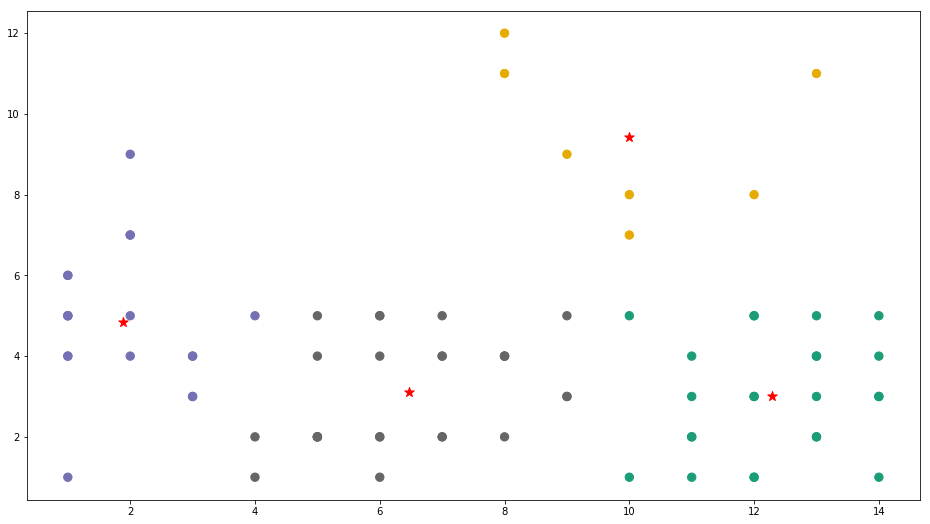

In [7]:
cmap_light = cm.get_cmap('Dark2', 4)
plt.rcParams['figure.figsize'] = (16, 9)
plt.scatter(X[:, 0], X[:, 1], c= kmeans.labels_.astype(float),cmap = cmap_light, s=70, alpha=1)
plt.scatter(centroids[:, 0], centroids[:, 1],marker='*', c='red', s=100)

In [8]:
clusterid = kmeans.labels_

In [9]:
time_id = X[:,0]
score = X[:,1]
patient_id = X1[:,2]

In [10]:
df_cluster1 = pd.DataFrame(list(zip(clusterid, time_id ,patient_id, score)))
df_cluster1.columns = ['cluster_id', 'time_id', 'patient_id', 'ans_score']
df_cluster1.tail(7)

,cluster_id,time_id,patient_id,ans_score
68,0,13,7,2
69,0,13,9,2
70,0,14,1,4
71,0,14,2,3
72,0,14,3,3
73,0,14,5,5
74,0,14,9,1


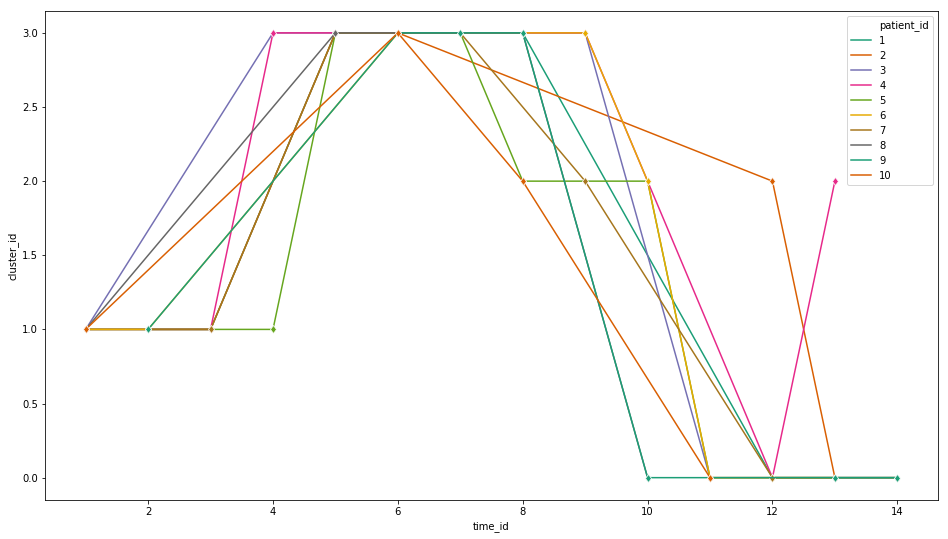

In [11]:
sns.lineplot(x="time_id", y="cluster_id", hue = "patient_id", data=df_cluster1, 
             palette=sns.color_palette('Dark2', n_colors=10), 
             marker = 'd')